# Section 7: Financial Concepts with Python

#### Discussion Topics (Review from CSC course):
- Efficient Market Hypothesis
- Measures of Return and Risk
- Sharpe Ratios
- Modern Portfolio Theory
- Capital Asset Pricing Model

## Efficient Market Hypothesis (EMH)

- states that asset prices reflect all avaialble information
- implies that all prices on the market are the fair value and its not possible to buy "undervalued" assets or consistently generate returns above market performance
- Random Walk Hypothesis: suggests changes in the stock prices have the same distribution and are independent of eacher other
    - past prices does not influence future prices and cant be used to predict future prices
    - Random Walk is a feature of EMH and there is some validity in it
#### But the EMH is not completely True

#### investing vs trading
- investing in securities:
    - securities are held for long periods of time (1 year or more)
    - goal is to build wealth over time, taking advantage of compound interest effects
- Trading securities:
    - more frequent transactions and typically shorter holding periods
    - primary goal is to beat market perforamcne for some set time period
        - e.g. beat the SP500 performance for the next 6 months

#### Evidence to disagree with EMH being 100% true
- Buffet's out performance of the SP500 for decades
- There is information out there that we not is not available to the market (public)
    - Insider Information: involves the illegal use of non-public info to trade
    - Company Fraud: involves general illegal activity or misreporting by a company
        - can the market be fairly pricing of companies with fradulent reporting
    - Proprietary Information: invovles the use of creating your own data from publicy available sources
        - satellite photos of parking lots to estimate retail sales activity
        - measuring how deep trading cargo ships sink into water to determine amount of cargo on board

How do we interpret the EMH?
- Invest in Securities:
    - actively trading managers largely don't outperform the market
- Trading in Securities:
    - Our assumption: for certain time frames with certain information strategies, it is possible to beat market returns



## Measurements of Return

- what is **fair** comparison?
    - we want our metrics to be **normalized** in order to be relevant regardless of number of outstanding shares or individual stock price
    - we can "normalize" by expression everything in the sense of ***PERCENT GAIN***
        - this allows us to faily compare two different holdings
    - However, the time periods of holdings can be different (e.g. 2 years vs. 6 months)
        - we can address this issue by focusing on a smaller unit of time, such as ***DAILY PERCENT RETURNS***
    - As long as we've held the security for some time, we can calcualte the ***MEAN DAILY PERCENT RETURN*** (daily percent return/# of days)
        - *this allows us to compare returns for different securities across different holding periods*

- we can use **mean daily percent return** as a normalized metric between different holdings for different time periods
- it's important to be aware of the effect of longer or shorter holding periods, in which case, we need to think about the **distribution** of these daily returns

## Measurement of Risk

- Risk is measuring the **dispersion** and **variance** of the price in between the start and end of the time period being analyzed
- risk is defined as the ***variance*** or ***standard deviation*** of a holding or portflio
- we saw that daily percent returns can be used to calculate a mean return metric that would be flexible to multiple holding periods
    - similarly, we can calcualte the **STANDARD DEVIATION OF DAILY PERCENT RETURNS** to get a measurement of risk
- using a standard deviation of daily percent returns, we can compare different holdings across different time periods

## Sharpe Ratio: Theory and Intuition

- Sharpe ratio combines our measurements of risk and return to compare different securities
- **risk free rate of return** is the annualied yield of a "risk free" investment, typically a U.S Treasury bond
    - it is considered to be a safe investment because the govt can always meet its obligation to pay the principal + interest of the treasury bond by printing more money
        - It's not as simple since, printing too much money raises inflation
        - The U.S. and other countries have **debt ceilings**, which means that theoretically, if the debt ceiling is not raised, the govt won't print more money and can't repay (this is unlikely)

- Sharpe ratio was originally called **reward-to-variability** ratio
    - Sharpe Ratio: mean asset return/ std. dev. of asset returns
    - **Sharpe Ratio: measurement of return / measurement of risk**
- **The larger the Sharpe ratio, the better**
    - the numerator is the measure of our return
        - we want this to be large
    - the denominator is the measure of our risk
        - we want this to be small


**Mean Asset Returns:**
- Daily Percent Return:
    - python code: df['Adj Close'].pct_change(1).mean()

**Standard Deviation of Asset Returns**
- Std. Dev. of Daily Percent Returns
    - python code: df['Adj Close'].pct_change(1).std()

#### Changing a Daily Sharpe Ratio to Yearly Sharpe Ratio
- there are 252 trading days in a year
- std is the square root of variance, meaning to be consistent with our units, we need to multiply a daily Sharpe Ratio by sqrt(252) to convert it to a yearly Sharpe Ratio

**Yearly Sharpe Ratio** = Daily Sharpe Ratio * sqrt(252)

### What is a good yearly Sharpe Ratio (SR)
**Generally speaking, no universal law**
- SR 0-1 :considered to be sub-optimal
    - the SP500 generally has a SR of 1, so you might be undeprforming the market
- SR 1-2: good
- SR 2-3: really good
- SR 3+: the best

<p>Make sure to compare portflois with same time period as the longer a portfolio is running, the lower its sharpe ratio would be generally speaking

## Sharpe Ratio: Python Implementation

In [167]:
import pandas as pd

In [168]:
aapl = pd.read_csv('apple.csv',index_col='Date',parse_dates=True)

In [169]:
msft = pd.read_csv('msft.csv',index_col='Date',parse_dates=True)

In [170]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,26.752501,26.757500,26.205000,26.315001,24.266081,163649200
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.286833,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.678219,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.214844,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.235069,324377600
...,...,...,...,...,...,...
2021-08-23,148.309998,150.190002,147.889999,149.710007,149.710007,60131800
2021-08-24,149.449997,150.860001,149.149994,149.619995,149.619995,48606400
2021-08-25,149.809998,150.320007,147.800003,148.360001,148.360001,58991300


In [171]:
msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,56.040001,56.189999,55.419998,55.480000,50.298279,27334100
2016-01-04,54.320000,54.799999,53.389999,54.799999,49.681782,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,49.908432,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,49.001839,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,47.297417,56564900
...,...,...,...,...,...,...
2021-08-23,303.250000,305.399994,301.850006,304.649994,304.649994,22830200
2021-08-24,305.019989,305.649994,302.000000,302.619995,302.619995,18175800
2021-08-25,304.299988,304.589996,300.420013,302.010010,302.010010,20006100


In [172]:
# creating a col for the Daily Percentage Return
aapl['Daily Return'] = aapl['Adj Close'].pct_change(1)

In [173]:
msft['Daily Return'] = msft['Adj Close'].pct_change(1)

In [174]:
aapl.head() 

# notice that the first row has a NaN value as a result of the .pct_change()
# this makes sense as there was no previous day for the first day 
# we should drop this row to prevent future issues in our calculations

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2015-12-31,26.752501,26.757500,26.205000,26.315001,24.266081,163649200,NaN
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.286833,270597600,0.000855
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.678219,223164000,-0.025059
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.214844,273829600,-0.019570
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.235069,324377600,-0.042205


In [175]:
aapl = aapl.dropna() # .dropna() drops "Not a Number" values

In [176]:
msft = msft.dropna()

In [177]:
# functions assumes that we already of the daily percentage return
def compute_sharpe_ratio(df,risk_free_rate=0):
    mean_return = df['Daily Return'].mean()
    std = df['Daily Return'].std()
    
    # DAILY SHARPE RATIO
    # sharpe_ratio = (mean_return-risk_free_rate)/std
    
    # YEARLY SHARPE RATIO (multiply by sqrt(252))
    sharpe_ratio = (mean_return-risk_free_rate)/std * (252**0.5) #np.sqrt(252)
    
    return sharpe_ratio

In [178]:
sr_apple = compute_sharpe_ratio(aapl) # daily sharpe ratio
sr_apple

1.2295225902465732

In [179]:
sr_msft = compute_sharpe_ratio(msft)
sr_msft

1.3052460572259017

<AxesSubplot:xlabel='Date'>

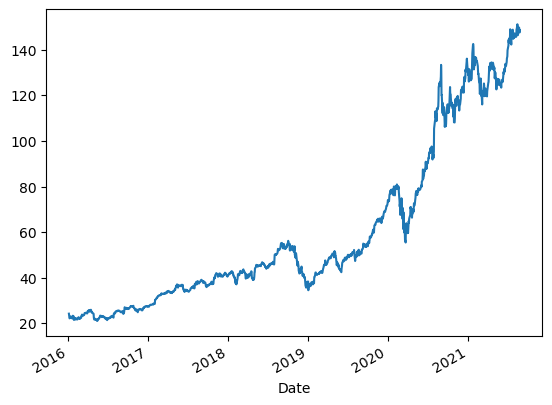

In [180]:
aapl['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

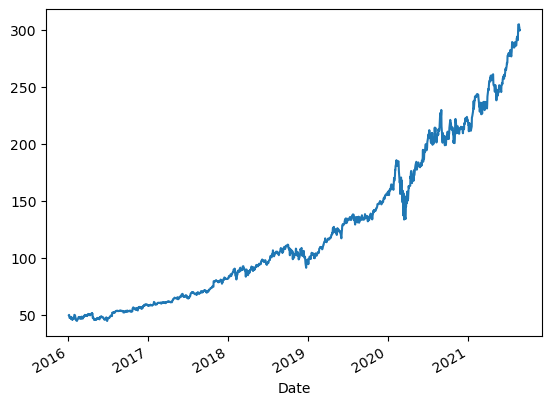

In [181]:
msft['Adj Close'].plot()

## Sortino Ratio: Theory and Intuition
- the sharpe ratio punished volatility (high std)
- But, what about volatility in the positive side (volatility but the price is going up and up)
    - we're just concerned with downside volatility
    - we can accept volatility in the upside (when prices are increasing)
<p><p>
- we simply only take into account the volatility (std) for returns below a threshold (typically set a zero)
        - returns where money was lost

## Sortinos: Python Implementation

In [182]:
def compute_sortino_ratio(df,threshold=0,risk_free_rate=0):
    
    mean_return = df['Daily Return'].mean()
    
    # VOLATILITY (THRESHOLD T)
    # T=0 --> NEGATIVE DAILY RETURNS
    downside = df[df['Daily Return'] <threshold]['Daily Return']
    
    std = downside.std()
    
    sortino_ratio = (mean_return-risk_free_rate)/std
    
    #ANNUALIZED
    return sortino_ratio*(252**0.5)

In [183]:
sort_aapl = compute_sortino_ratio(aapl)
sort_aapl

1.613582243456224

In [184]:
sort_msft = compute_sortino_ratio(msft)
sort_msft

1.695151173199413

## Probabilistic Sharpe Ratio (PSR)
- **kurtosis**: measure of the "tailedness" of the probability distribution of a real-valued random variable
    - how "fat-tailed" or "peak-tailed" a distribution is
    - positive kurtosis: the distribution is taller/peakier than the normal curve
    - negative kurtosis: the distribution is shorter/fatter than the normal curve
- **skewness**: measure of the asymmetry of the probability distribution of a real-valued randm variable
    - normal (no skew):
        - the mean and mode are aligned, the mean is the most frequent value as well. This is a normal distribution
    - negatively skewed:
        - the *mean is to the **left** of the mode*
        - The mean is less than the most frequent value, there is a bulge towards the right side of the curve
        - the left/"negative" side is shorter/skinnier
    - positively skewed:
        - the *mean is to the **right** of the mode*
        - The mean is more than the most frequent value, there is a bulge towards the left side of the curve
        - the right/"positive" side is taller/fatter

- the PSR takes into account the skew and kurtosis of retusn to return a Sharpe Ratio in probabilty terms
    - Although skewness and kurtosis does not affect the point estimate of Sharpe ratio, *it greatly impacts its confidence bands, and consequently its statistical significance*
    - e.g. we have a 95% chance of getting a SR of 1.6

The problem of the sharpe ratio is, that it is calculated via historical data and thus it only yields an estimation and not the true sharpe ratio!

To tackle this problem you can use the *Probabilistic Sharpe Ratio* 
It is defined as 
$$ \text{cdf} \Big( \frac{(\widehat{\text{SR}} - SR^*)}{\widehat{\sigma}({\widehat{SR})}} \Big)$$
where cdf is the cummulative density function of the normal function, <br />
$\widehat{SR}$ is the original sharpe ratio,<br />
$SR^*$ is the benchmark sharpe ratio (often 0), <br />
and $\hat{\sigma}(\widehat{SR})$ is the standard deviation of the estimated sharpe ratio which is computed as follows:

$$ \hat{\sigma}(\hat{SR}) = \sqrt{\frac{1}{n-1} \Big (1 + \frac{1}{2} \widehat{\text{SR}}^2 - \gamma_3 \hat{\text{SR}} + \frac{\gamma_4}{4} \widehat{\text{SR}}^2 \Big )} $$

Here, $\gamma_3$ and $\gamma_4$ correspond to skew and fisher kurtosis.

In words, the probabilistic sharpe ratio computes the propability that the true sharpe ratio is $\leq$ the estimated sharpe ratio ($PSR = P(SR \leq \widehat{\text{SR}})$) given the benchmark sharpe ratio.

To compute skew kurtosis and cdf, we can use scipy.stats

## Probabilistic Sharpe Ratio (PSR): Python Implementation

In [185]:
# functions assumes that we already of the daily percentage return
def compute_sharpe_ratio(df,risk_free_rate=0):
    mean_return = df['Daily Return'].mean()
    std = df['Daily Return'].std()
    
    # DAILY SHARPE RATIO
    sharpe_ratio = (mean_return-risk_free_rate)/std
    
    return sharpe_ratio

In [186]:
import scipy.stats #allows us to get the skew and kortosis

In [187]:
def compute_psr(df,benchmark=0):
    sr = compute_sharpe_ratio(df)
    skew = scipy.stats.skew(df['Daily Return'])
    kurtosis = scipy.stats.kurtosis(df['Daily Return'],fisher=True)
    n = len(df)
    # The sigma sharp Ratio
    sigma_sr = ( (1/(n-1)) * (  1+ 0.5*sr**2 + skew*sr+(kurtosis/4)*sr**2  )  )**0.5
    ratio = (sr-benchmark)/sigma_sr
    psr = scipy.stats.norm.cdf(ratio)
    return psr
    

In [188]:
psr_aapl = compute_psr(aapl)

In [189]:
psr_aapl

0.998209740839951

In [190]:
# annualized psr for apple
psr_aapl *(252**0.5)

15.846088383268473

In [191]:
psr_msft = compute_psr(msft)

In [192]:
psr_msft * (252**0.5)

15.857652835916307

## Modern Portfolio Theory (MPT)
- relies on a simple premise:
    - investors are generally risjk averse, so given two portfolios with identical retusn, theouy would choose the one with lower volatility
**Monte Carlo Simulation:**
- a simple (but complutationally expensive) way to do this is to randomly generate holdings (making sure they add up to 100%) and then calculate their historical return and volatility

## Equally Weighted Portfolio: Python implementation

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
COST = pd.read_csv('COST.csv',index_col='Date',parse_dates=True)['Adj Close'] # we just want the adjusted close price col

In [195]:
COST

Date
2016-09-06    140.896622
2016-09-07    138.739395
2016-09-08    136.805038
2016-09-09    134.335831
2016-09-12    135.218338
                 ...    
2021-08-27    450.339996
2021-08-30    455.929993
2021-08-31    455.489990
2021-09-01    456.519989
2021-09-02    460.970001
Name: Adj Close, Length: 1258, dtype: float64

In [196]:
WMT = pd.read_csv('WMT.csv',index_col='Date',parse_dates=True)['Adj Close']
TGT = pd.read_csv('TGT.csv',index_col='Date',parse_dates=True)['Adj Close']
DG = pd.read_csv('DG.csv',index_col='Date',parse_dates=True)['Adj Close']

In [197]:
# we combine the 4 different DataFrames for the adjusted close of each of these companies
# into one DataFrame, this is how we start building and comparing our portflio

retail = pd.concat([COST,WMT,TGT,DG],axis=1)
retail.columns = ['COST','WMT','TGT','DG']

In [198]:
retail

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


In [199]:
# DataFrame for the daily percent returns
retail_return = retail.pct_change(1).dropna()
retail_return

,COST,WMT,TGT,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


<AxesSubplot:xlabel='Date'>

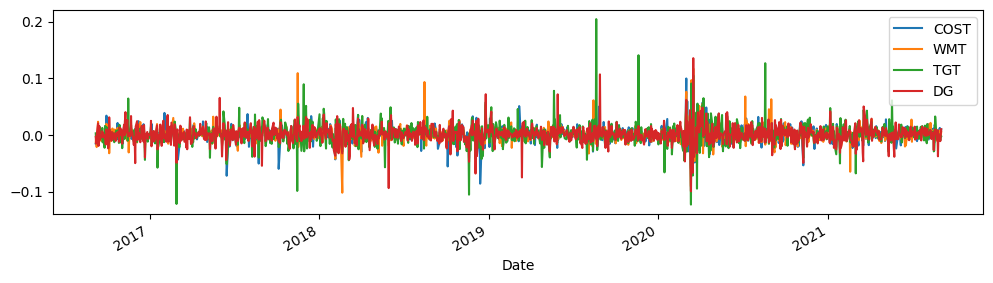

In [200]:
retail_return.plot(figsize=(12,3))

<AxesSubplot:xlabel='Date'>

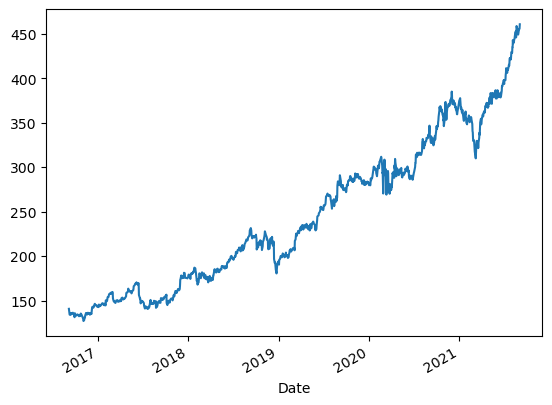

In [201]:
retail['COST'].plot()

In [202]:
# We want to see our percent gain or loss at every point
cumul_return = (1 + retail_return['COST']).cumprod() -1 #our cumulative return in percent 

In [203]:
cum_perc_return = 100 * cumul_return

<AxesSubplot:xlabel='Date'>

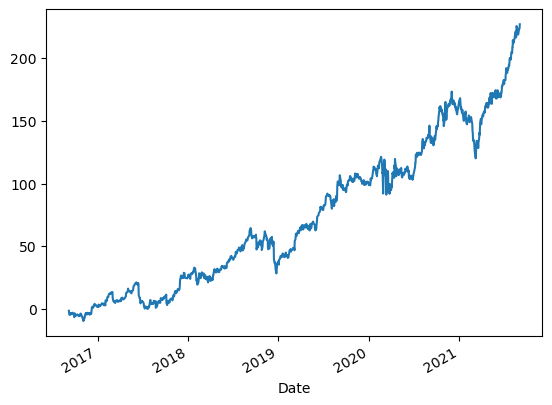

In [204]:
cum_perc_return.plot()

In [205]:
np.dot([2,3],[10,20]) # this is the dot product meaning (2*10) + (3*20)

80

In [206]:
example_returns = np.array([1,0.5]) #100 % and 50% returns

In [207]:
weights = [1,0] # where does the cash go? 100% into the stock with 100% return

In [208]:
np.dot(weights,example_returns)

1.0

In [209]:
weights = [0.5,0.5] # 50% of cash in to the 100% reutn stock, and another 50% in the 50% return stock

In [210]:
np.dot(weights,example_returns)

0.75

In [211]:
np.dot([1,0,0,0],retail_return.transpose()) # a portfolio that puts 100% into COST

array([-0.01531071, -0.01394238, -0.01804909, ..., -0.00096507,
        0.0022613 ,  0.00974768])

In [212]:
retail_return['COST']

Date
2016-09-07   -0.015311
2016-09-08   -0.013942
2016-09-09   -0.018049
2016-09-12    0.006569
2016-09-13   -0.006263
                ...   
2021-08-27    0.002292
2021-08-30    0.012413
2021-08-31   -0.000965
2021-09-01    0.002261
2021-09-02    0.009748
Name: COST, Length: 1257, dtype: float64

In [213]:
np.dot([0.5,0,0.25,0.25],retail_return.transpose()) # a portfolio with a combination of holdings

array([-0.00781003, -0.01372145, -0.01099856, ..., -0.00558652,
        0.00026645,  0.00685398])

In [214]:
N = len(retail_return.columns)

In [215]:
N

4

In [216]:
# the line below says to give me 1/N N times
equal_weights = N * [1/N] #this is a python list, not a numpy list, so the multiplication is not broadcasted


In [217]:
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [218]:
equal_return = np.dot(equal_weights,retail_return.transpose())

In [219]:
equal_return

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [220]:
# What is the cumulative daily returns
cum_equal_weighted_returns = (1+equal_return).cumprod() -1

In [221]:
cum_equal_weighted_returns

array([-0.00720156, -0.01815581, -0.02975273, ...,  2.32411376,
        2.32132463,  2.34037771])

In [222]:
cum_equal_weighted_returns_percent = 100* cum_equal_weighted_returns

In [223]:
# cewrp = cumulative equally weighted return percentage
cewrp = pd.Series(cum_equal_weighted_returns_percent,index=retail_return.index)

In [224]:
cewrp

Date
2016-09-07     -0.720156
2016-09-08     -1.815581
2016-09-09     -2.975273
2016-09-12     -1.647971
2016-09-13     -2.569954
                 ...    
2021-08-27    232.170295
2021-08-30    233.970413
2021-08-31    232.411376
2021-09-01    232.132463
2021-09-02    234.037771
Length: 1257, dtype: float64

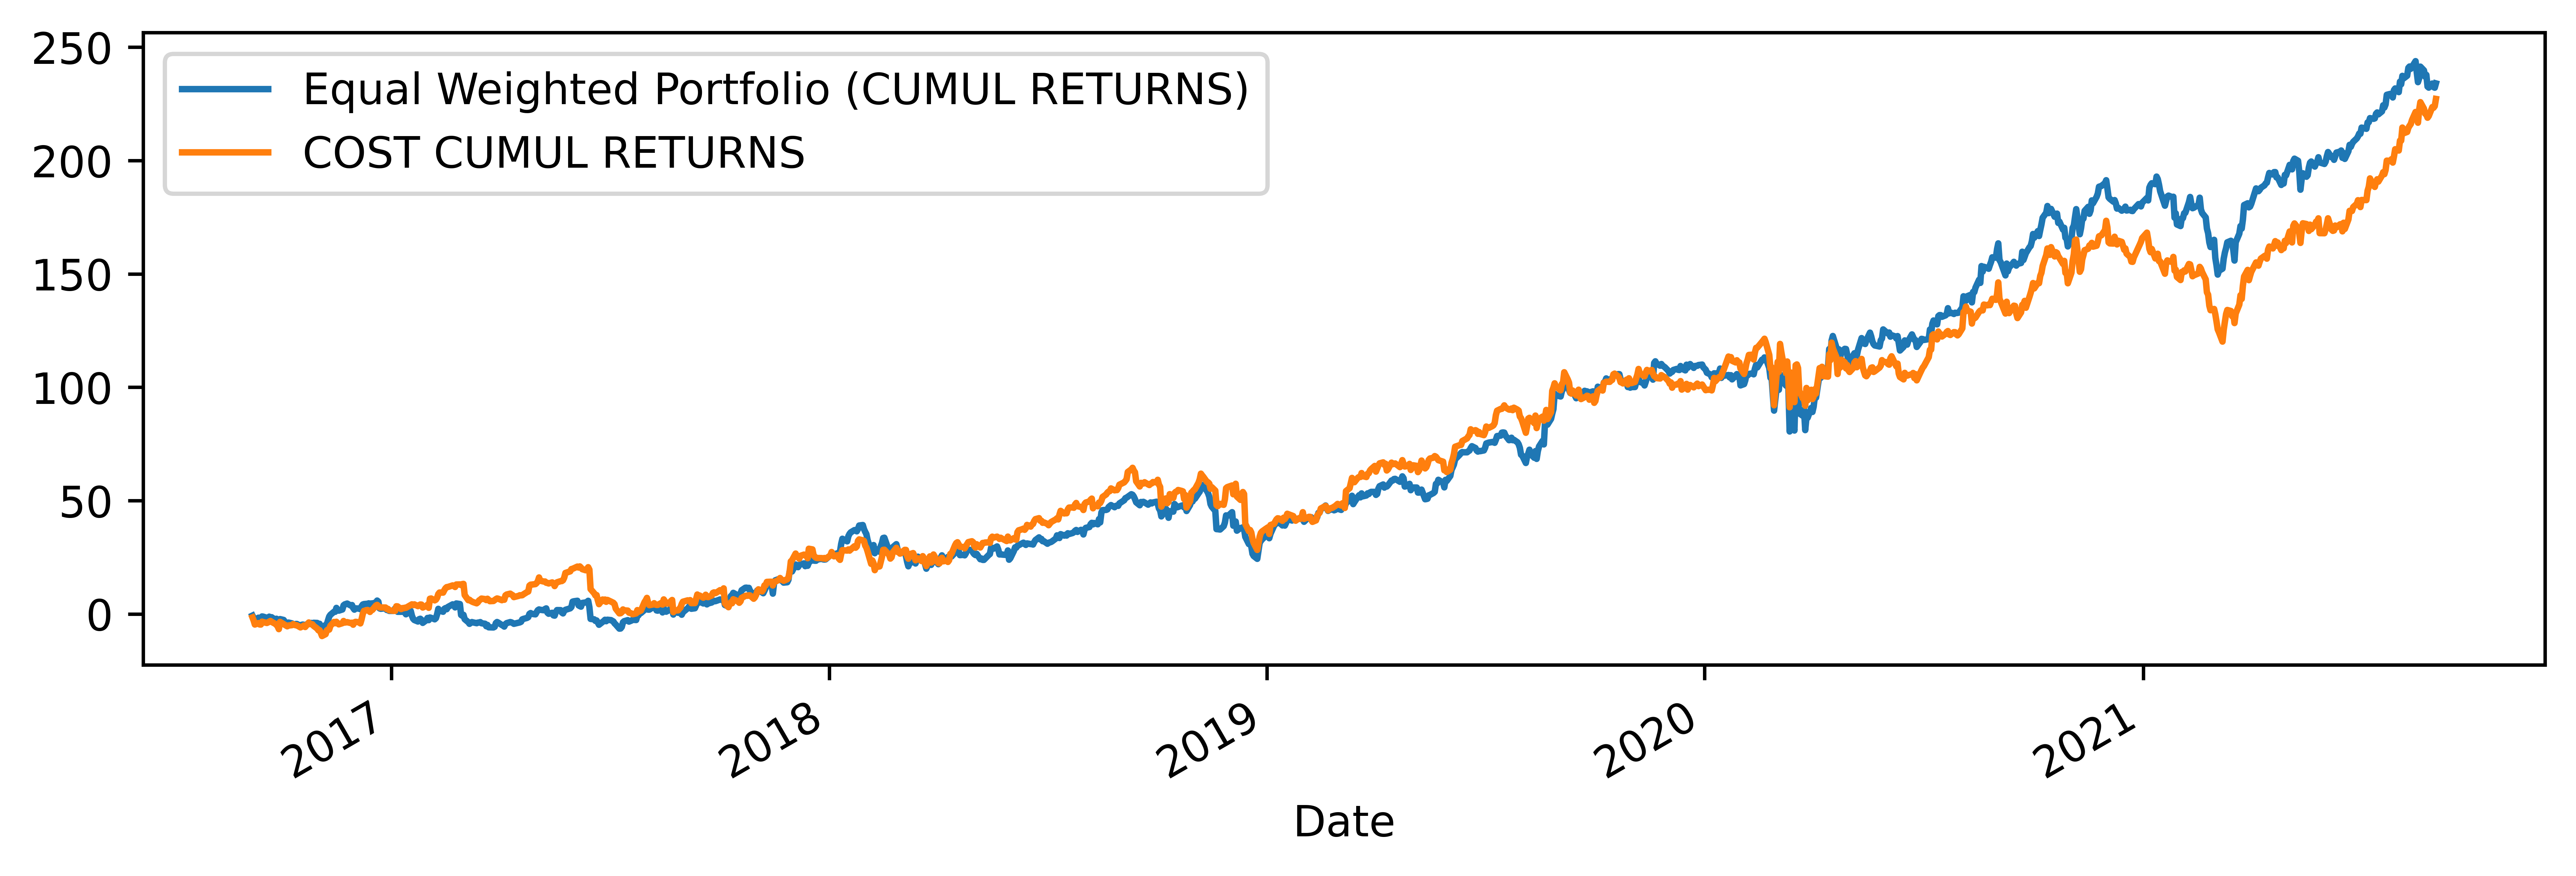

In [225]:
plt.figure(figsize=(10,3),dpi=1000)
cewrp.plot(label='Equal Weighted Portfolio (CUMUL RETURNS)')
cum_perc_return.plot(label='COST CUMUL RETURNS')
plt.legend()

## Log Returns: Theory and Intuition
- converting returns to log returns gives a lot of mathematical benefits, especially in quantitative finance
- we'll be working with log operations
- log returns allow us to quickly use a sequwence of returns to calcualte the **compounding return** otherwise known as the **cumulative return**
- Compund Return in regular terms: (here r means returns)
    - (1+r1)(1+r2)(1+r3)...(1+rn) = cumul. prod of (1+ri)
        - we're able to do this calculation in pandas using the .pct_change(1) method
- Compound Return in log terms:
    - Sum of log(1+ri) = log(1+r1) + log(1+r2) + log(1+r3) + ... log(1+rn) = log(pn) - log(p0)
        - using the log rules, we can simply subtract the log of initial price from the log of final price to get the cumulative return
    - This saves us a lot of computational time
        - **takes us from O(n) linear time to O(1) constant time**
- there's no "free lunch" here
    - log returns are less intuitive and harder to interpret
    - however, for the purposees of comparison of returns, using log returns, it should be fine

## Monte Carlo Simulation: Python Implementation

In [226]:
retail

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


In [227]:
retail/retail.shift(1) # calcualtes the percent holding from the previous day

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,0.984689,0.987123,1.002853,0.996528
2016-09-08,0.986058,0.996809,0.988051,0.984948
2016-09-09,0.981951,0.978700,0.993378,0.998726
2016-09-12,1.006569,1.023328,1.004347,1.020475
...,...,...,...,...
2021-08-27,1.002292,0.994367,1.000884,0.997123
2021-08-30,1.012413,1.008053,1.000722,1.000488
2021-08-31,0.999035,1.002708,0.990456,0.989129


In [228]:
log_rets = np.log(retail/retail.shift(1))

In [229]:
log_rets

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,-0.015429,-0.012960,0.002849,-0.003478
2016-09-08,-0.014040,-0.003197,-0.012021,-0.015166
2016-09-09,-0.018214,-0.021530,-0.006644,-0.001275
2016-09-12,0.006548,0.023060,0.004338,0.020268
...,...,...,...,...
2021-08-27,0.002290,-0.005649,0.000883,-0.002882
2021-08-30,0.012336,0.008021,0.000722,0.000488
2021-08-31,-0.000966,0.002705,-0.009590,-0.010931


In [230]:
retail_return

,COST,WMT,TGT,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


In [231]:
N = len(retail.columns)

In [232]:
weights = np.random.random(N)

In [233]:
weights # four random numbers (weights) for each stock

array([0.28530803, 0.41633669, 0.07612144, 0.15470853])

In [234]:
# dividing the wqeights by the sum of the weights, we average them and make sure that they sum to 1 (100%)
weights/np.sum(weights) 

array([0.30596865, 0.44648578, 0.08163379, 0.16591178])

In [235]:
np.sum([0.31413312, 0.19525084, 0.36401461, 0.12660144]) # all the wights add up to 1 (100%) + or - some rounding errors|

1.00000001

In [236]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/np.sum(weights)

In [237]:
gen_weights(4)

array([0.38104232, 0.25443761, 0.27623493, 0.08828515])

In [238]:
def calculate_returns(weights,log_rets):
    # log_rets is our daily returns
    # we take the average of our daily returns log_rets, multiply it with out weights and then take the sum
    
    return np.sum(log_rets.mean()*weights) *252 #returns the annualized returns
    

In [239]:
log_rets_cov = log_rets.cov() #portfolio volatility or covariance
log_rets_cov

,COST,WMT,TGT,DG
COST,0.000176,0.000107,0.000120,0.000104
WMT,0.000107,0.000187,0.000121,0.000108
TGT,0.000120,0.000121,0.000370,0.000170
DG,0.000104,0.000108,0.000170,0.000248


In [240]:
def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov) # volatility
    return np.sqrt(vol)

In [241]:
calculate_volatility(weights,log_rets_cov)

0.17417931429870093

In [242]:
log_rets = np.log(retail/retail.shift(1))
log_rets_cov = log_rets.cov()

In [243]:
log_rets

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,-0.015429,-0.012960,0.002849,-0.003478
2016-09-08,-0.014040,-0.003197,-0.012021,-0.015166
2016-09-09,-0.018214,-0.021530,-0.006644,-0.001275
2016-09-12,0.006548,0.023060,0.004338,0.020268
...,...,...,...,...
2021-08-27,0.002290,-0.005649,0.000883,-0.002882
2021-08-30,0.012336,0.008021,0.000722,0.000488
2021-08-31,-0.000966,0.002705,-0.009590,-0.010931


In [258]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []

for sim in range(6000):
    
    weights = gen_weights(N=4)
    mc_weights.append(weights)
    sim_returns = calculate_returns(weights,log_rets)
    mc_portfolio_returns.append(sim_returns)
    sim_vol = calculate_volatility(weights, log_rets_cov)
    mc_portfolio_vol.append(sim_vol)

In [259]:
len(mc_portfolio_returns)

6000

In [260]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

Text(0, 0.5, 'RET')

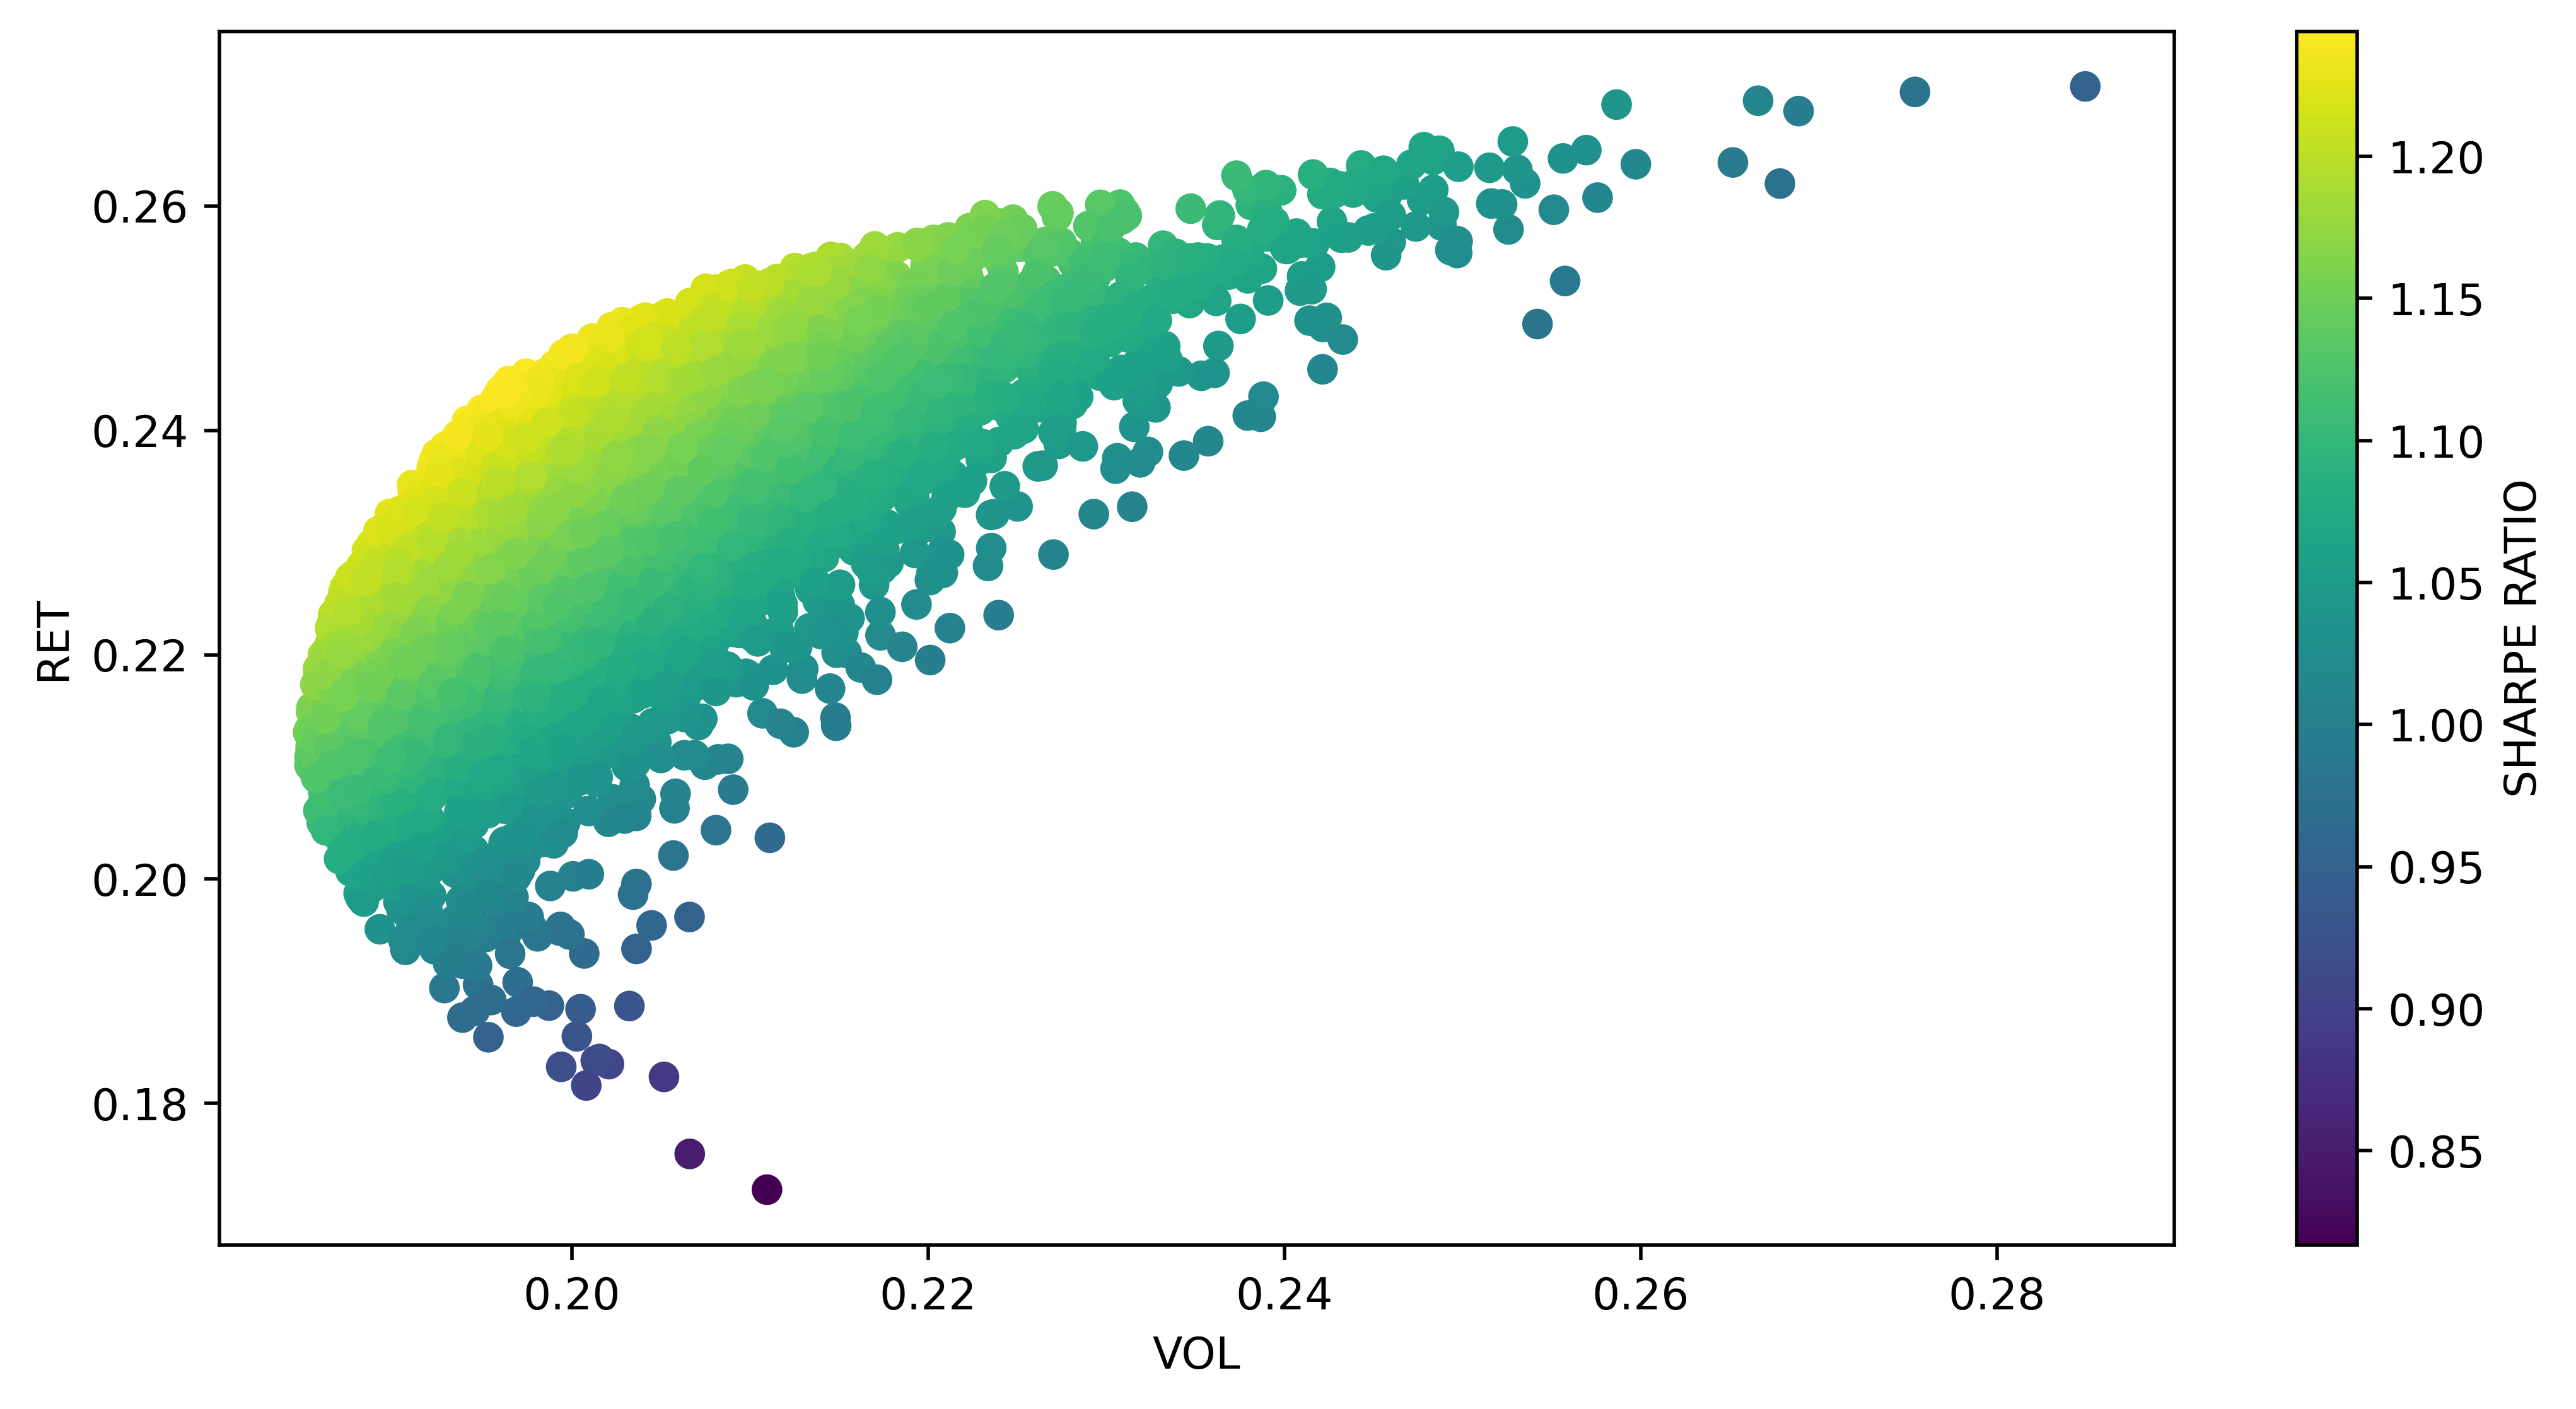

In [261]:
plt.figure(dpi=500,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='SHARPE RATIO')
plt.xlabel('VOL')
plt.ylabel('RET')

**How to figure out which one has te HIGHEST Sharpe Ratio**

In [262]:
np.argmax(mc_sharpe_ratios)

2987

In [263]:
mc_weights[2987] # this is the optimnal holdings for our portfolio

array([0.59809288, 0.01194751, 0.17257282, 0.21738679])

## Minimization Search (optimization): Python

In [264]:
from scipy.optimize import minimize

In [265]:
minimize

<function scipy.optimize._minimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)>

In [267]:
# help(minimize)
# the minimize function takes a lot of arguments to minimize a function

In [268]:
# we want scipy.minimize() to find the weights that minimize this function since we're multiplying by -1
# in turn, we can find the weights that maximize the Sharpe Ratio

def function_to_minimize(weights):
    # MINIMIZE a -1 * SR since this is the same as finding the MAX SHARPE RATIO
    
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [269]:
# CONSTRAINT 1: every weight must be within 0 to 100% (0,1)
# settings bounds for every possible weight value per stock (4 stocks) for the .minimize() method

bounds = tuple((0,1) for n in range(N))

In [270]:
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [271]:
# CONSTRAINT 2: the weights must add up to 1
# we need to create a constraint dictionary
# in the .minimize() function, the constraints must add up to 0, hence why we subtract 1
sum_constraint = ({'type':'eq','fun':lambda weights: np.sum(weights)-1})

In [273]:
equal_weights # this will be our starting point for the .minimize() function

[0.25, 0.25, 0.25, 0.25]

In [276]:
minimize(fun=function_to_minimize,
        x0=equal_weights,
        bounds=bounds,
        constraints=sum_constraint)

     fun: -1.2451267776172796
     jac: array([-3.51697206e-04,  5.83363324e-02,  1.11971796e-03,  3.20374966e-05])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.58456807, 0.        , 0.17679023, 0.23864169])

In [278]:
# This is the optimal weight findings that scipy.minimize() delivers
np.array([0.58456807, 0.        , 0.17679023, 0.23864169])

array([0.58456807, 0.        , 0.17679023, 0.23864169])

<AxesSubplot:xlabel='Date'>

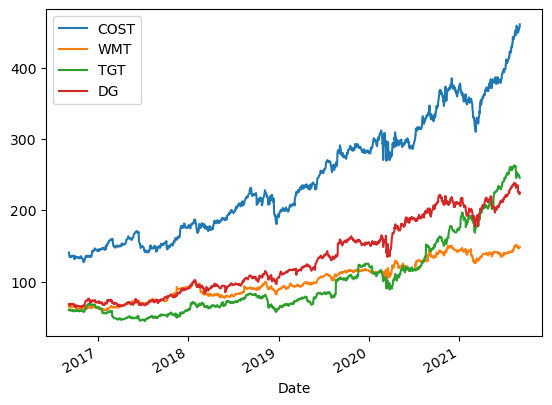

In [279]:
retail.plot()

- this is only taking historical data into account and it's only looking back
- **past performance doesnt guarantee future results**


## Efficient Frontier: Python Implementation

In [282]:
expected_returns_range = np.linspace(0.18,0.28,100) #this range was taken from the Y-axis of the Monte Carlo Simulation

In [283]:
expected_returns_range

array([0.18      , 0.1810101 , 0.1820202 , 0.1830303 , 0.1840404 ,
       0.18505051, 0.18606061, 0.18707071, 0.18808081, 0.18909091,
       0.19010101, 0.19111111, 0.19212121, 0.19313131, 0.19414141,
       0.19515152, 0.19616162, 0.19717172, 0.19818182, 0.19919192,
       0.20020202, 0.20121212, 0.20222222, 0.20323232, 0.20424242,
       0.20525253, 0.20626263, 0.20727273, 0.20828283, 0.20929293,
       0.21030303, 0.21131313, 0.21232323, 0.21333333, 0.21434343,
       0.21535354, 0.21636364, 0.21737374, 0.21838384, 0.21939394,
       0.22040404, 0.22141414, 0.22242424, 0.22343434, 0.22444444,
       0.22545455, 0.22646465, 0.22747475, 0.22848485, 0.22949495,
       0.23050505, 0.23151515, 0.23252525, 0.23353535, 0.23454545,
       0.23555556, 0.23656566, 0.23757576, 0.23858586, 0.23959596,
       0.24060606, 0.24161616, 0.24262626, 0.24363636, 0.24464646,
       0.24565657, 0.24666667, 0.24767677, 0.24868687, 0.24969697,
       0.25070707, 0.25171717, 0.25272727, 0.25373737, 0.25474

In [284]:
constraints = ({'type':'eq','fun':lambda weights:np.sum(weights)-1},
               {'type':'eq','fun':lambda weights:calculate_returns(weights,log_rets)-possible_return})

In [285]:
# this time, we're trying to minimize our VOLATILITY
def calculate_vol(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [286]:
frontier_vol = []
portfolio_holdings = []

for possible_return in expected_returns_range:
    
    result = minimize(calculate_vol,equal_weights,bounds=bounds,constraints=constraints)
    
    # VOLATILITY for the RETURNS that we want
    frontier_vol.append(result['fun'])
    portfolio_holdings.append(result['x'])
    

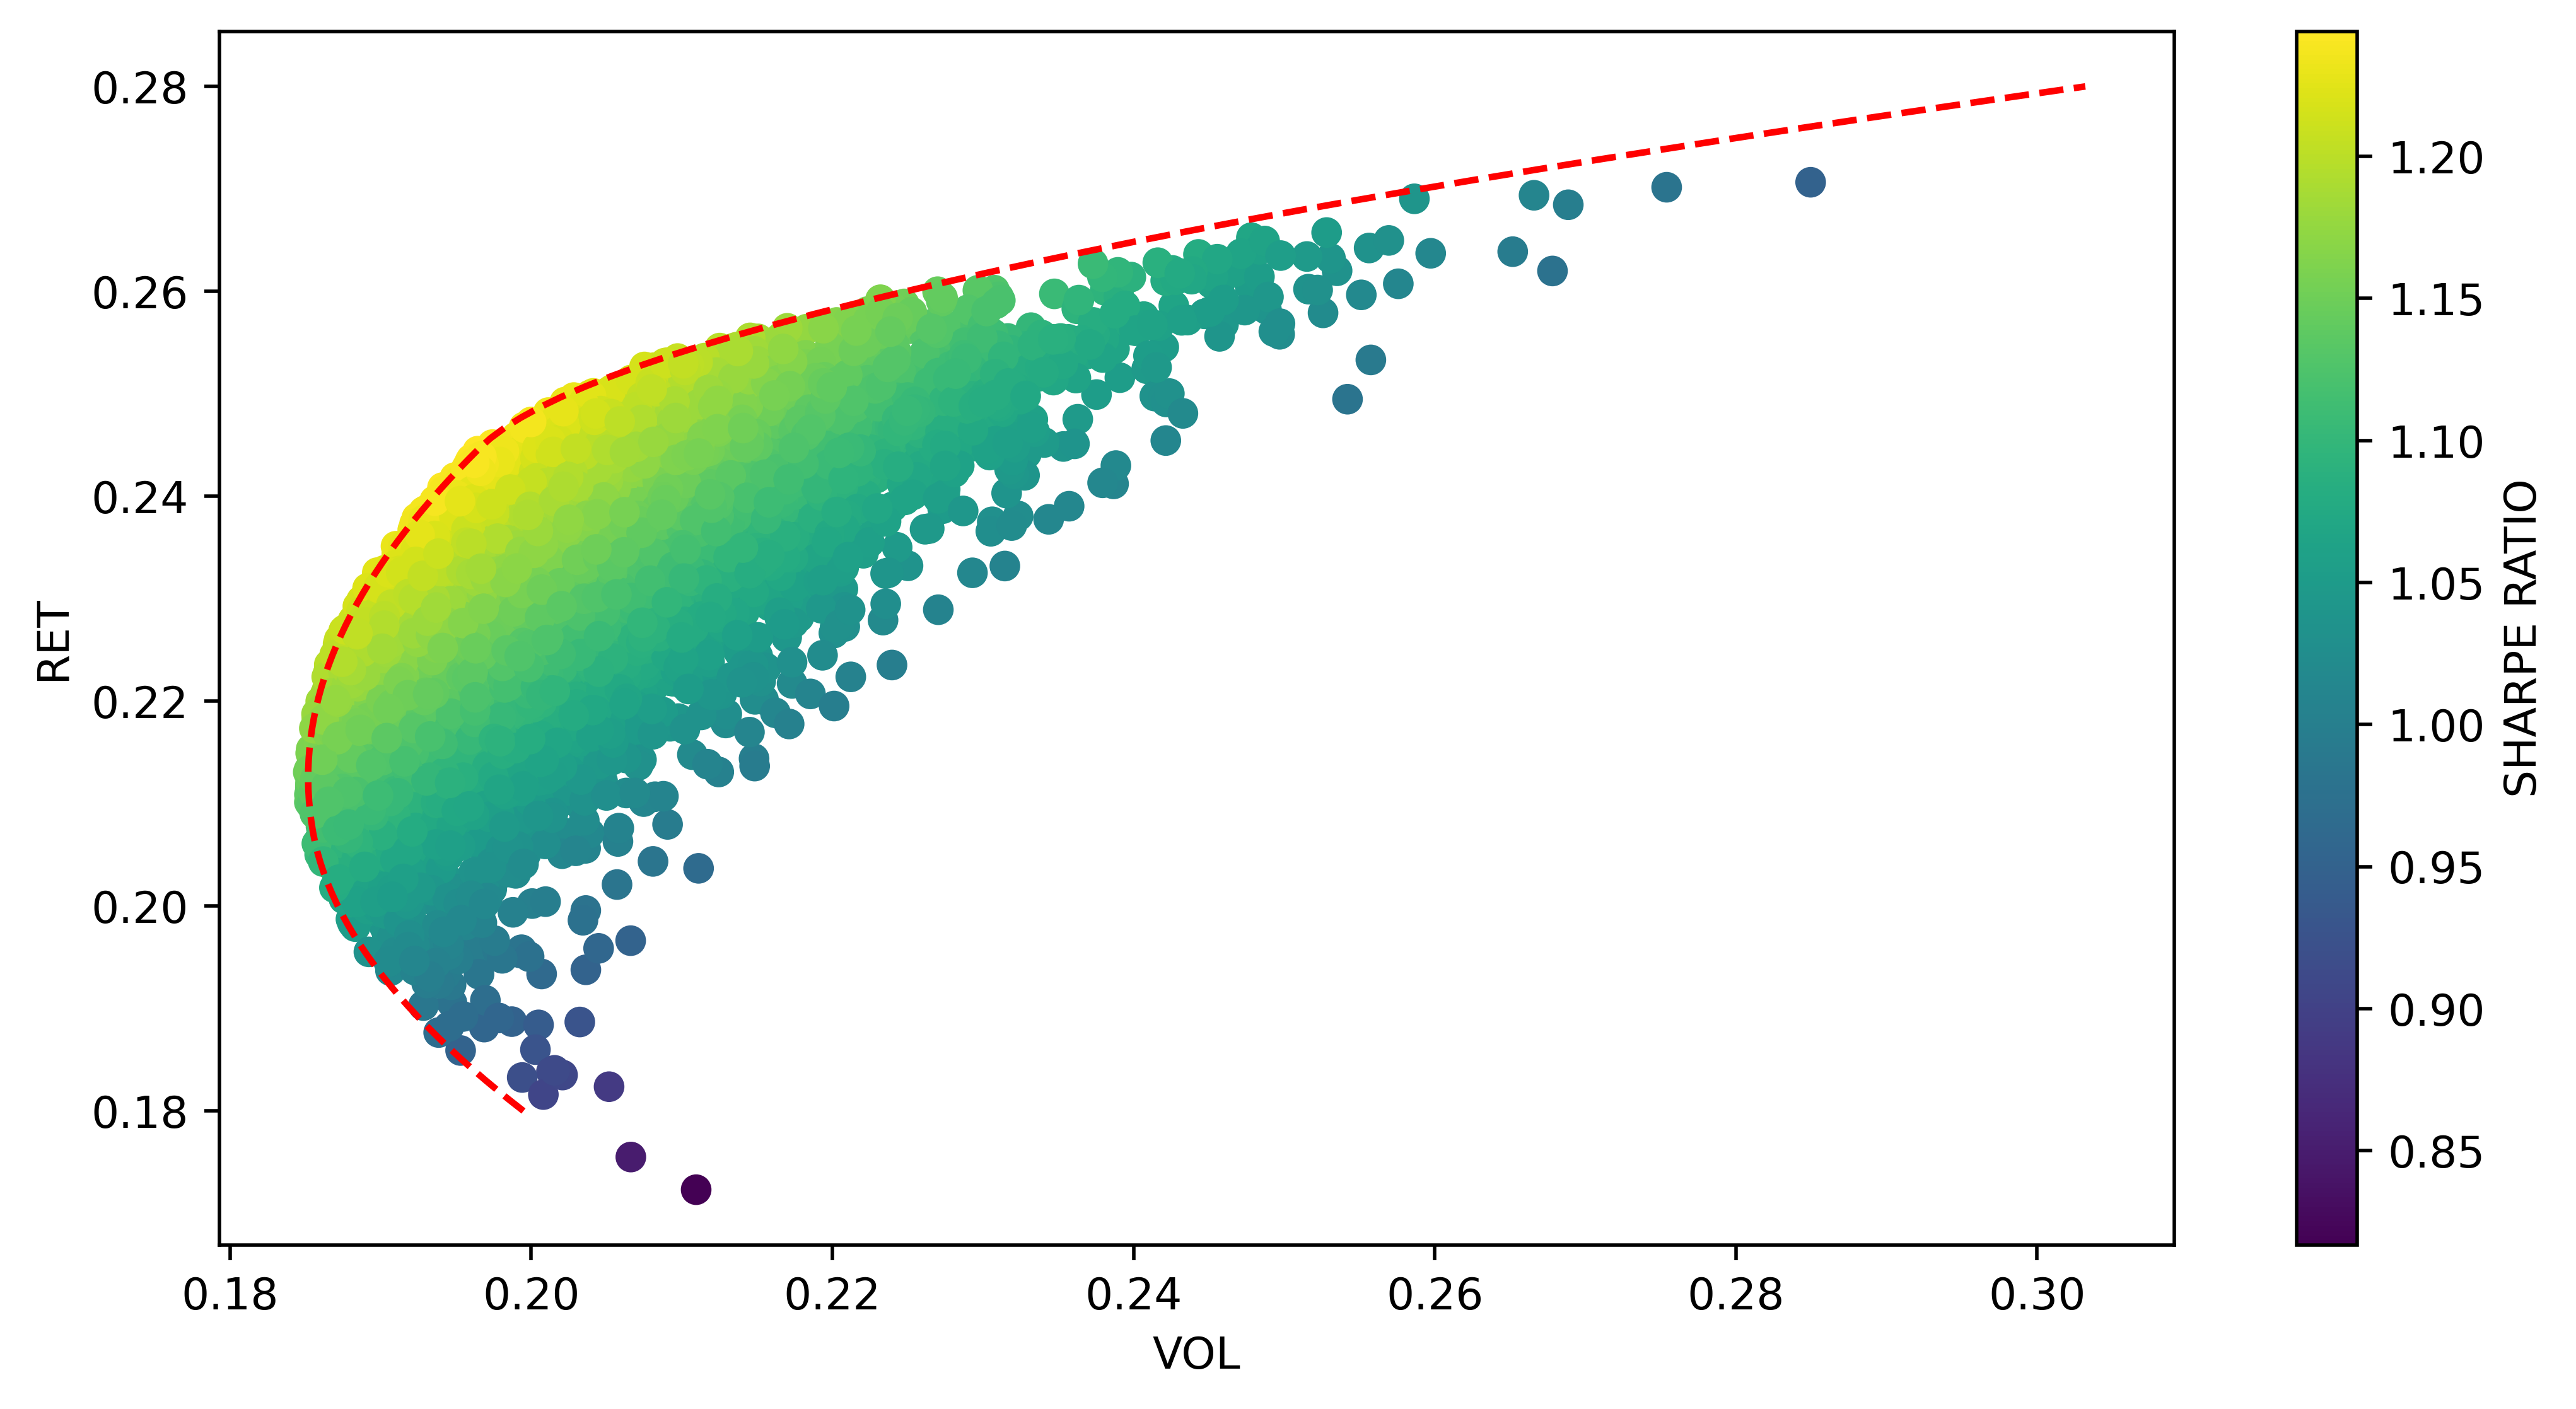

In [287]:
plt.figure(dpi=500,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='SHARPE RATIO')
plt.xlabel('VOL')
plt.ylabel('RET')

# CREATING OUR EFFICIENT FRONTIER LINE PLOT
plt.plot(frontier_vol,expected_returns_range,color='red',ls='--')

In [291]:
portfolio_holdings

[array([1.53553154e-01, 7.77394698e-01, 3.90312782e-18, 6.90521478e-02]),
 array([0.16240317, 0.76386509, 0.        , 0.07373174]),
 array([1.71253286e-01, 7.50335480e-01, 4.33680869e-18, 7.84112343e-02]),
 array([1.80103521e-01, 7.36805868e-01, 4.11996826e-18, 8.30906114e-02]),
 array([1.88953890e-01, 7.23276254e-01, 3.03576608e-18, 8.77698556e-02]),
 array([1.97804395e-01, 7.09746638e-01, 1.04083409e-17, 9.24489666e-02]),
 array([0.20665508, 0.69621702, 0.        , 0.0971279 ]),
 array([2.15505911e-01, 6.82687397e-01, 1.08420217e-18, 1.01806692e-01]),
 array([2.24356933e-01, 6.69157772e-01, 3.90312782e-18, 1.06485295e-01]),
 array([2.33208107e-01, 6.55628145e-01, 2.60208521e-18, 1.11163748e-01]),
 array([0.24205951, 0.64209851, 0.        , 0.11584197]),
 array([2.50911115e-01, 6.28568880e-01, 1.73472348e-18, 1.20520005e-01]),
 array([2.59762920e-01, 6.15039243e-01, 2.16840434e-18, 1.25197837e-01]),
 array([0.26861495, 0.6015096 , 0.        , 0.12987545]),
 array([0.27746723, 0.587979

In [292]:
frontier_vol

[0.19949327326019212,
 0.19861819369020475,
 0.1977682162378236,
 0.19694366591345433,
 0.19614486339829587,
 0.19537212450177283,
 0.19462575964973952,
 0.19390607343602698,
 0.19321336392375343,
 0.1925479223365823,
 0.19191003226880538,
 0.19129996936855873,
 0.19071800066165914,
 0.1901643840948114,
 0.18963936793924072,
 0.18914319040668667,
 0.18867607898102312,
 0.1882382500669856,
 0.18782990847577086,
 0.18745133248851395,
 0.1871024450070434,
 0.18678367095773904,
 0.186495078278611,
 0.18623680734153736,
 0.18600898447026806,
 0.1858117216329035,
 0.18564511626597482,
 0.18550925082190617,
 0.1854026031549671,
 0.18531441954099534,
 0.18525159331124552,
 0.18521189025569493,
 0.1851953253225548,
 0.1852019048244409,
 0.18523162647607577,
 0.18528447938061413,
 0.18536044403241997,
 0.1854594922718985,
 0.18558158700755778,
 0.18572668135505715,
 0.1858947157809932,
 0.1860856092494048,
 0.18629923650686264,
 0.18653574584690216,
 0.1867951435916769,
 0.18707640143845192,
 0.

**how to find the portfolio holdings for a specific volatility?**

In [293]:
frontier_vol = np.array(frontier_vol)

In [294]:
np.where(frontier_vol > 0.24)

# THESE ARE THE INDICES OF OUR PORTFOLIO HOLDINGS LIST THAT HAVE A VOLATILITY GREATER THAN 0.24

(array([84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int64),)

In [295]:
portfolio_holdings[84]

# as you go towards higher volatility, you have less diversification in your portfolio holdings
# in this case, we only have 2 holdings in our portfolios

array([3.64716769e-01, 1.04083409e-17, 6.35283231e-01, 0.00000000e+00])

In [296]:
frontier_vol[84]

0.24006958159899652

In [298]:
expected_returns_range[84]

0.2648484848484849